# Linear Regression


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [5]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

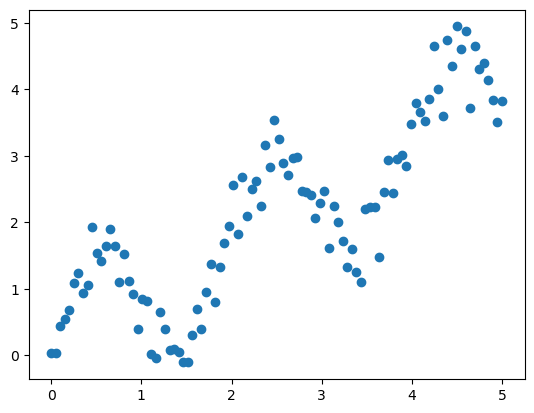

In [6]:
plt.scatter(x,y)

#### nonlinear

In [11]:
regr_lin = LinearRegression()

In [13]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [15]:
regr_lin.fit(X,y)

LinearRegression()

0.599843530696655


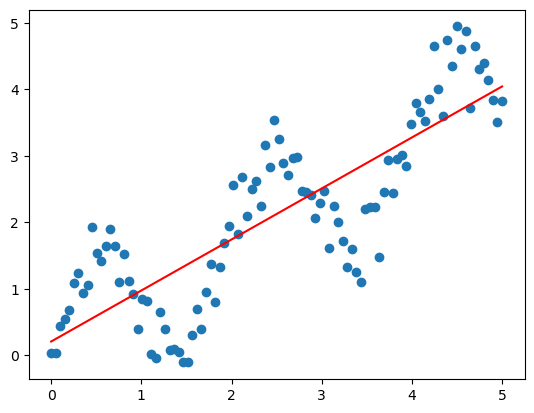

In [17]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [22]:
print(x.shape)

(100,)


In [24]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [26]:
regr_poly = LinearRegression()

In [28]:
regr_poly.fit(X_poly, y)

LinearRegression()

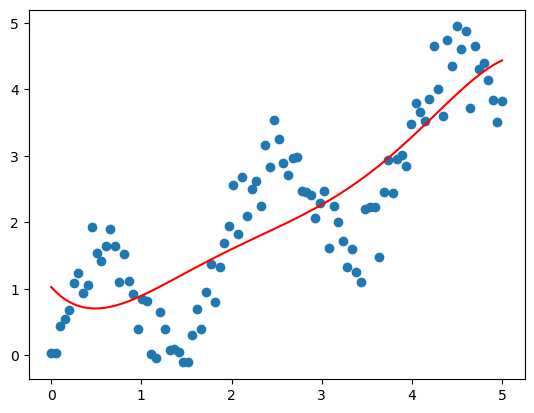

In [30]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [32]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.51553114  2.18357763 -0.9905741   0.2049304  -0.01531694]
interception:  1.0295297165797255


In [41]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b
Mse = np.sum((regr_poly.predict(X_poly)-y)**2) / len(y)
print(Mse)

0.5426360044421655


In [43]:
regr_poly.predict(X_poly)

array([1.02952972, 0.95843124, 0.89772517, 0.84669309, 0.80464735,
       0.77093052, 0.74491474, 0.72600112, 0.71361917, 0.70722614,
       0.70630648, 0.7103712 , 0.71895725, 0.73162695, 0.74796739,
       0.76758977, 0.79012887, 0.81524239, 0.84261037, 0.8719346 ,
       0.90293797, 0.93536391, 0.96897579, 1.00355625, 1.03890669,
       1.0748466 , 1.11121295, 1.14785966, 1.18465691, 1.22149059,
       1.25826167, 1.2948856 , 1.33129173, 1.36742267, 1.40323371,
       1.43869221, 1.47377699, 1.50847774, 1.54279439, 1.57673654,
       1.61032283, 1.64358035, 1.67654403, 1.70925604, 1.74176517,
       1.77412625, 1.80639953, 1.83865009, 1.87094722, 1.90336382,
       1.93597582, 1.96886152, 2.00210104, 2.03577571, 2.06996743,
       2.10475811, 2.14022902, 2.17646024, 2.21353001, 2.25151414,
       2.29048542, 2.330513  , 2.37166179, 2.41399187, 2.45755785,
       2.50240831, 2.54858517, 2.59612309, 2.64504885, 2.6953808 ,
       2.7471282 , 2.80029061, 2.85485737, 2.91080687, 2.96810

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [46]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [48]:
sigma = 0.3

In [50]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [52]:
regr_rbf = LinearRegression()

In [54]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

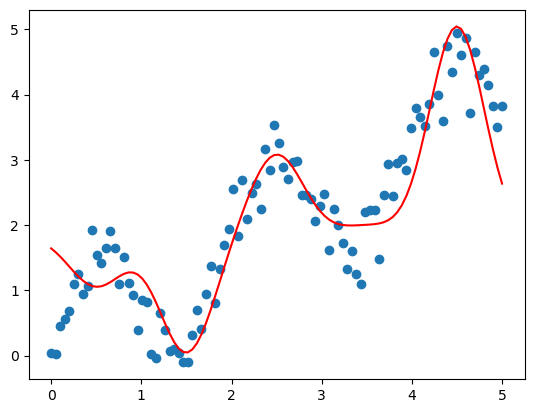

In [58]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [60]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.77514711 -1.79333747  1.25118543  0.15149211  3.20808963]
interception:  1.8370173320858711


#### Comparison

In [63]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

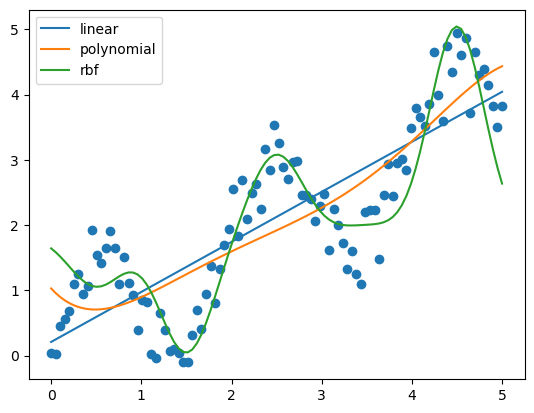

In [65]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [68]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.599843530696655


In [70]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5426360044421655


In [72]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.29072677338794617
